**Task 3 Flazetech(Car Price Prediction With Machine Learning)**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('car data.csv')

In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
df.shape

(301, 9)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
print(df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [29]:
print(df.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [30]:
print(df.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [31]:
from sklearn.preprocessing import LabelEncoder
fuel_type_encoder = LabelEncoder()
df['Fuel_Type'] = fuel_type_encoder.fit_transform(df['Fuel_Type'])

seller_type_encoder = LabelEncoder()
df['Seller_Type'] = seller_type_encoder.fit_transform(df['Seller_Type'])

transmission_encoder = LabelEncoder()
df['Transmission'] = transmission_encoder.fit_transform(df['Transmission'])

In [32]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [33]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,1,0
297,brio,2015,4.00,5.9,60000,2,0,1,0
298,city,2009,3.35,11.0,87934,2,0,1,0
299,city,2017,11.50,12.5,9000,1,0,1,0
300,brio,2016,5.30,5.9,5464,2,0,1,0


**Linear Regression:**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [36]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [37]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=2)

In [39]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [40]:
pred=model.predict(X_train)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score

error_score = r2_score(Y_train,pred)
mae = mean_absolute_error(Y_train, pred)
mse = mean_squared_error(Y_train,pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R squared Error : ", error_score)


Mean Absolute Error: 1.2312956364167345
Mean Squared Error: 3.3530232328077783
R squared Error :  0.8788102076855939


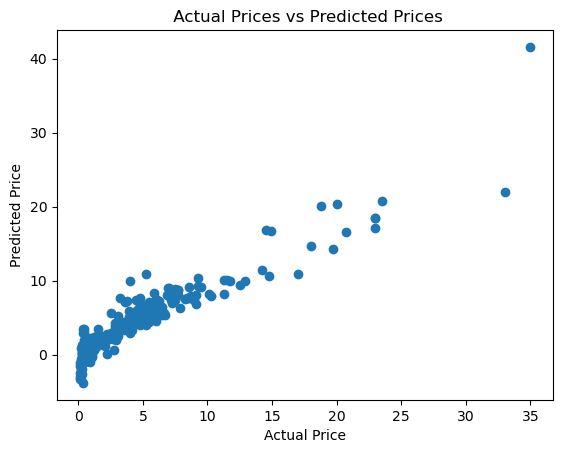

In [44]:
plt.scatter(Y_train,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [45]:
preds=model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score

error_score = r2_score(Y_test,preds)
mae = mean_absolute_error(Y_test, preds)
mse = mean_squared_error(Y_test,preds)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R squared Error : ", error_score)

Mean Absolute Error: 1.1402294463163254
Mean Squared Error: 2.0596913174651683
R squared Error :  0.8635018684158602


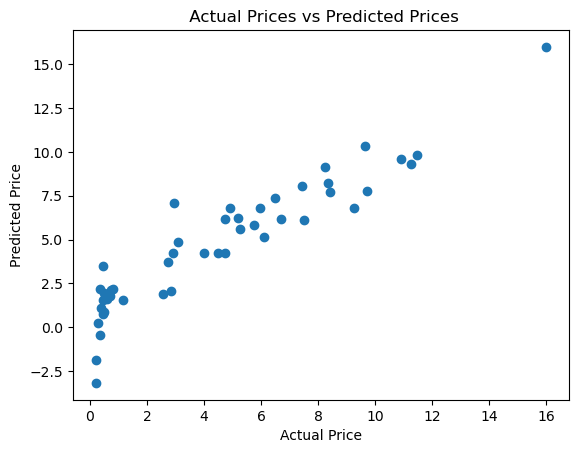

In [49]:
plt.scatter(Y_test,preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**Lasso Regression:**

In [51]:
from sklearn.linear_model import Lasso

# Now you can use Lasso
Model = Lasso()

In [52]:
Model.fit(X_train,Y_train)

Lasso()

In [53]:
pred=Model.predict(X_train)

In [54]:
error_score = r2_score(Y_train,pred)
mae = mean_absolute_error(Y_train, pred)
mse = mean_squared_error(Y_train,pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R squared Error : ", error_score)

Mean Absolute Error: 1.307012793059898
Mean Squared Error: 4.425994515245487
R squared Error :  0.8400293350672257


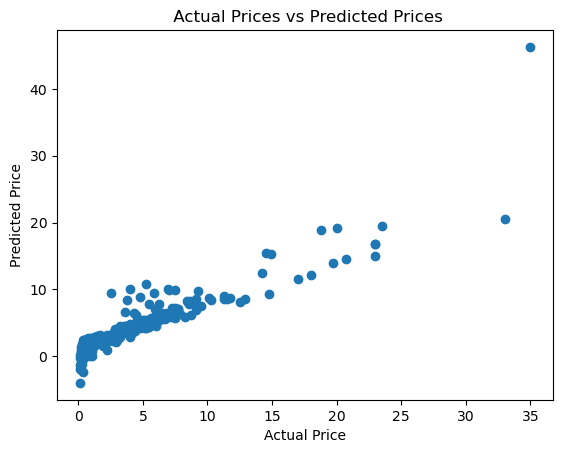

In [55]:
plt.scatter(Y_train, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [56]:
preds = Model.predict(X_test)

In [57]:
error_score =r2_score(Y_test,preds)
mae = mean_absolute_error(Y_test, preds)
mse = mean_squared_error(Y_test,preds)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R squared Error : ", error_score)

Mean Absolute Error: 1.0189589195080886
Mean Squared Error: 1.5992741453031356
R squared Error :  0.8940142482159141


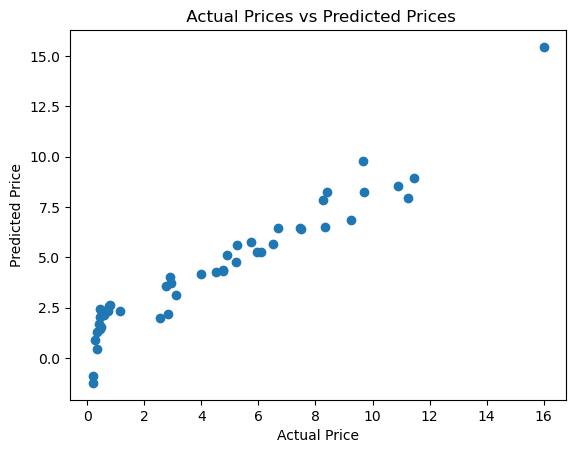

In [58]:
plt.scatter(Y_test,preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()